# 課題　ボストン住宅価格　線形回帰

## 線形回帰とは何か？

以下の要点を全て含み記述しましょう。

- 線形回帰とは何か。
- 具体的に言うと？
- 分類と何か違うのか。

### 答え

２次元の変数xとyの変数間に一方 x が他方 y を左右ないし決定する影響があるとき、 x を 独立変数 、 y を 従属変数と言います。  
＊ y = f(x) のxが独立変数　yが従属変数  
この関係式を要約して線を当てはめるのが線形回帰です。   
また、データサイエンスの世界では２乗和誤差関数（sklearnのLinearRegression）などを使い計算したデータを線で表したりします。  
具体的にいうと、データを真ん中で分けた線のことを言います。

分類は具体的な数字を出さず元々あるクラスに分けるのに対し、線形回帰はデータによく当てはまる「線」を引きそこで分けます。

早速　回帰分析をしていきます。

# 必要なライブラリをインポート

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings('ignore')

# ボストンデータの取得

In [156]:
boston = load_boston()

X = pd.DataFrame(boston.data,columns = boston.feature_names)
y = pd.DataFrame(boston.target)

In [157]:
X = X["LSTAT"]

# 単回帰と重回帰についての違いを記述せよ

## 答え

単回帰分析というのは1つの目的変数を1つの説明変数で予測するもので、重回帰分析は1つの目的変数を複数の説明変数で予測しようというものです。

# trainデータtestデータの分割

In [158]:
# 練習用のため乱数seedを０指定
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# 線形モデルで学習

In [159]:
lin_1d = LinearRegression()
lin_1d.fit(X_train[:,None],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [160]:
# 決定関数
score_1d = lin_1d.score(X_test[:,None],y_test)
score_1d

0.43095672846187616

# 決定係数とは何か記述せよ

以下の観点をすべて含めて記述しましょう。
- 決定係数とは何か
- もっとも説明変数が、目的変数を説明できる場合、決定係数は何になるか
- どのように求めることができるか

## 答え
独立変数（説明変数）が従属変数（目的変数）のどれくらいを説明できるかを表す値である。  
説明変数が、目的変数を説明できる（相関関係にある）場合、決定係数は１に近づき、１に近いほど分析の精度が高いことを表します。  

決定係数を求めるにためには、＊ Rは相関係数
$$ R^2 = 1- \frac{目的変数の予測値の偏差平方和}{目的変数の観測値の偏差平方和}\ $$ 
一般式で表すと
$$ R^2 = 1 - \frac{\sum_{i = 1} ^ {a}(y_i - f(x_i))2}{\sum_{i = 1} ^ {a}(y_i - μ_y)^2}\ $$


またscikit-learn を用いた線形回帰での求め方は、LinearRegression().score(説明変数,目的変数)
となります。



# 決定係数をいかなる場合も信じても良いか記述せよ(決定係数が高ければ、汎用性があるモデルと言えるか)

決定係数はいかなる場合でも信じて良い訳ではありません。　　
決定係数は、分析の目的が「ある変数の値を予測したい」の場合には適切な指標ですが、ある変数の影響の有無が主眼であり予測は重視しない場合には、決定係数に注目することはあまり意味がないと言えます。  

またデータ数が少ない場合なども、決定係数のぶれが大きいため、一概に高いからといって信用してしまうのは危険です。  
またまたデータが少なく決定係数が高くなってしまった。ということもあるので、注意することが必要です。  
他にも、決定係数が１の場合などは同じ特徴を計算しているため、こちらも意味がないと言えます。



# 2,3,4次式の回帰

In [161]:
lin_2d = LinearRegression()
lin_3d = LinearRegression()
lin_4d = LinearRegression()

degree_2 = PolynomialFeatures(degree = 2)
degree_3 = PolynomialFeatures(degree = 3)
degree_4 = PolynomialFeatures(degree = 4)

x_train_2 = degree_2.fit_transform(X_train[:,None])
x_train_3 = degree_3.fit_transform(X_train[:,None])
x_train_4 = degree_4.fit_transform(X_train[:,None])

lin_2d.fit(x_train_2,y_train)
lin_3d.fit(x_train_3,y_train)
lin_4d.fit(x_train_4,y_train)

x_test_2 = degree_2.fit_transform(X_test[:,None])
x_test_3 = degree_3.fit_transform(X_test[:,None])
x_test_4 = degree_4.fit_transform(X_test[:,None])

score_2d = lin_2d.score(x_test_2,y_test)
score_3d = lin_3d.score(x_test_3,y_test)
score_4d = lin_4d.score(x_test_4,y_test)

print("二次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_2d))
print("三次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_3d))
print("四次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_4d))

二次式における'LSTAT'の住宅価格への決定係数は0.52
三次式における'LSTAT'の住宅価格への決定係数は0.54
四次式における'LSTAT'の住宅価格への決定係数は0.57


# 次数が大きくなるとどうなるか記述せよ

- 説明変数をxとして、次数を増やしていくとどのように数式が変化していくか記述せよ（1次式 ax + b）
- 次数を増やすとどのようなメリットが考えられるか
- 次数を増やすとどのようなデメリットが考えられるか


## 答え
決定係数の次数が増えた際の数式は、  
１次式　　$$ y　= ax + b $$
2次式　 $$ y = ax^2 + bx + c $$
3次式　$$ y = ax^3 + bx^2 + cx + d $$
のように増えて行く、よって一般式で表すと、
$$ \sum_{i = 0}^{n}\ c_ix^i $$
＊ciは定数とする
 
メリットとして次数を増やす事により表現力が高くなるので、１次関数などより表現が豊かになる（誤差（データとのずれ）がすくなる）
またデメリットは、次数を増やしすぎてしまうと、過学習を起こしてしまい汎用性の無いモデルになってしまうこともある。
   


# 重回帰

今回は、LSTATのみを使用したが、他の特徴量も使用して学習させましょう。重回帰を使用して、0.71以上の決定係数出れば合格です。



# 相関行列のヒートマップ

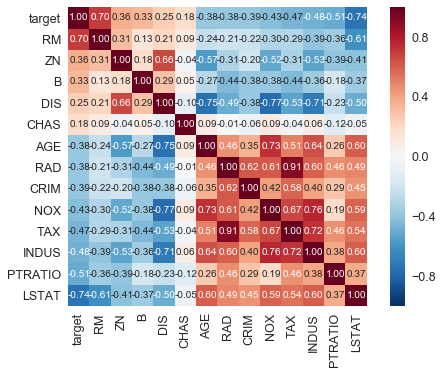

In [243]:
# データの結合
boston_data = pd.DataFrame(boston.data,columns = boston.feature_names)
boston_data["target"] = y

#カラム数確認

boston_data.shape
#　ヒートマップの変数の数（要素数）
k =14

#ボストンの相関係数を計算
corrmat = boston_data.corr()

#特徴名を値順で取り出し
cols = corrmat.nlargest(k, 'target')['target'].index

#np.corrcoed()相関関係代数を計算
cm = np.corrcoef(boston_data[cols].values.T)

#Seabornのデフォルトスタイルが適用される
sns.set(font_scale=1.25)

#ヒートマップ作成
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

上記から相関係数の強い特徴を取り出す。  
（０に近いほど関係がなく１に近いほど正の相関−1に近いほど負の相関）  
今回はヒートマップから"RM","PTRATIO","LSTAT","INDUS","TAX","NOX"を使う事にする。

In [246]:
X = pd.DataFrame(boston.data,columns = boston.feature_names)
y = pd.DataFrame(boston.target)

X = X[["RM","PTRATIO","LSTAT","INDUS","TAX","NOX"]]

In [247]:
# 練習用のため乱数seedを０指定
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# 最適な次数を見つける

In [248]:
score = []

for i in range(1,7):
    lin_nd = LinearRegression(normalize= True)
    degree_n = PolynomialFeatures(degree = i)
    X_train_n = degree_n.fit_transform(X_train)
    X_test_n = degree_n.fit_transform(X_test)
    lin_nd.fit(X_train_n,y_train)
    score.append([i,lin_nd.score(X_test_n,y_test)])

    
score.sort(key=lambda x: x[1])
score.reverse()

print("{0[0][0]}次元　:スコア {0[0][1]}".format(score))

3次元　:スコア 0.7206653525995397


# 重回帰について記述せよ

- 以下の観点をすべて含めて記述しましょう。
- 説明変数を増やすことでどのようなメリットがあるか
- 説明変数を増やすことでどのようなデメリットがあるか

重回帰分析とは一つの特徴量で回帰分析することを「単回帰分析」といい複数の特徴で回帰分析することを「重回帰分析」という

重回帰分析のメリットは、説明変数を一つしか使わない単回帰分析に比べて予想の精度が上がる。  
連続値データに適している。

デメリットは、説明変数同士の相関係数が高いものを入れると精度が落ちることや、相関係数が０に近いものを入れると、精度が落ちたり手間がかかる。  
離散型のデータには適さない。